In [12]:
import pandas as pd 
import numpy as np

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv('DelayedFlights.csv', index_col=0, parse_dates=['DepTime'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936758 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              object
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(13), int64(10), object(6)
memory usage: 443.3+ MB


In [16]:
df['DepTime']

0          2003.0
1           754.0
2           628.0
4          1829.0
5          1940.0
            ...  
7009710    1250.0
7009717     657.0
7009718    1007.0
7009726    1251.0
7009727    1110.0
Name: DepTime, Length: 1936758, dtype: object

In [17]:
df.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [18]:
df.shape

(1936758, 29)

In [19]:
round(df.describe(),2)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1936758.00,1936758.00,1936758.00,1936758.00,1929648.00,1936758.00,1936758.00,1928371.00,1936560.00,...,1936758.00,1929648.00,1936303.00,1936758.00,1936758.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,2008.0,6.11,15.75,3.98,1467.47,1610.14,1634.22,2184.26,133.31,134.30,...,765.69,6.81,18.23,0.00,0.00,19.18,3.70,15.02,0.09,25.30
std,0.0,3.48,8.78,2.00,424.77,548.18,464.63,1944.70,72.06,71.34,...,574.48,5.27,14.34,0.02,0.06,43.55,21.49,33.83,2.02,42.05
min,2008.0,1.00,1.00,1.00,0.00,1.00,0.00,1.00,14.00,-25.00,...,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2008.0,3.00,8.00,2.00,1135.00,1316.00,1325.00,610.00,80.00,82.00,...,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2008.0,6.00,16.00,4.00,1510.00,1715.00,1705.00,1543.00,116.00,116.00,...,606.00,6.00,14.00,0.00,0.00,2.00,0.00,2.00,0.00,8.00
75%,2008.0,9.00,23.00,6.00,1815.00,2030.00,2014.00,3422.00,165.00,165.00,...,998.00,8.00,21.00,0.00,0.00,21.00,0.00,15.00,0.00,33.00
max,2008.0,12.00,31.00,7.00,2359.00,2400.00,2400.00,9742.00,1114.00,660.00,...,4962.00,240.00,422.00,1.00,1.00,2436.00,1352.00,1357.00,392.00,1316.00


### Sta znace kolone? 

- Year 2008
- Month 1-12
- DayofMonth 1-31
- DayOfWeek 1 (Monday) - 7 (Sunday)
- DepTime actual departure time (local, hhmm)
- CRSDepTime scheduled departure time (local, hhmm)
- ArrTime actual arrival time (local, hhmm)
- CRSArrTime scheduled arrival time (local, hhmm)
- UniqueCarrier unique carrier code
- FlightNum flight number
- TailNum plane tail number: aircraft registration, unique aircraft identifier
- ActualElapsedTime in minutes
- CRSElapsedTime in minutes
- AirTime in minutes
- ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
- DepDelay departure delay, in minutes
- Origin origin IATA airport code
- Dest destination IATA airport code
- Distance in miles
- TaxiIn taxi in time, in minutes
- TaxiOut taxi out time in minutes
- Cancelled was the flight cancelled
- CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
- Diverted 1 = yes, 0 = no
- CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
- WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
- NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
- SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
- LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [20]:
df.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [21]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,1.936560e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,1.343027e+02,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,7.134144e+01,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,8.200000e+01,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,1.160000e+02,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,1.650000e+02,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,6.600000e+02,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [22]:
df.columns.to_list()

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [23]:
round(df[['CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']].describe(),2)

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,19.18,3.70,15.02,0.09,25.30
std,43.55,21.49,33.83,2.02,42.05
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,2.00,0.00,2.00,0.00,8.00
75%,21.00,0.00,15.00,0.00,33.00
max,2436.00,1352.00,1357.00,392.00,1316.00


In [24]:
df['WeatherDelay'].value_counts()

0.0       1148570
10.0         2868
6.0          2738
15.0         2709
7.0          2527
           ...   
475.0           1
750.0           1
745.0           1
1352.0          1
510.0           1
Name: WeatherDelay, Length: 599, dtype: int64

In [25]:
### Droping na values for ArrDelay 

In [26]:
df.dropna(axis=0,subset=['ArrDelay'], inplace=True)

In [27]:
df.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   3
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

In [28]:
np.mean(df['WeatherDelay'])

3.7035706956700185

In [29]:
df['WeatherDelay']=df['WeatherDelay'].fillna(np.mean(df['WeatherDelay']))

In [30]:
df['CarrierDelay']=df['CarrierDelay'].fillna(np.mean(df['CarrierDelay']))

In [31]:
df['NASDelay']=df['NASDelay'].fillna(np.mean(df['NASDelay']))

In [32]:
df['SecurityDelay']=df['SecurityDelay'].fillna(np.mean(df['SecurityDelay']))

In [33]:
df['LateAircraftDelay']=df['LateAircraftDelay'].fillna(np.mean(df['LateAircraftDelay']))

In [34]:
df.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              3
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [35]:
df.dropna(axis=0, subset=['TailNum'], inplace=True)

In [36]:
### original df shape, before dealing with NA: 1936758

In [37]:
df.shape

(1928368, 29)

In [38]:
### correlation of attributes 

In [39]:
correlation_matrix=df.corr()

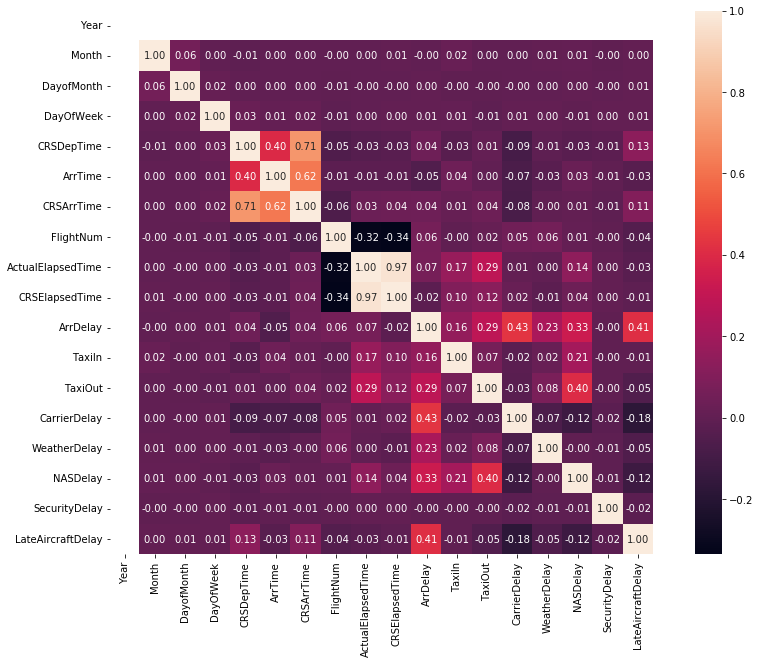

In [136]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, square=True, fmt='.2f')
plt.show()

In [41]:
df['Cancelled'].value_counts()

0    1928368
Name: Cancelled, dtype: int64

In [42]:
df['Diverted'].value_counts()

0    1928368
Name: Diverted, dtype: int64

In [44]:
df1=pd.read_csv('DelayedFlights.csv', index_col=0, parse_dates=['DepTime'])

In [45]:
df1['Cancelled'].value_counts()

0    1936125
1        633
Name: Cancelled, dtype: int64

In [46]:
df1['Diverted'].value_counts()

0    1929004
1       7754
Name: Diverted, dtype: int64

In [47]:
### since there is only 633 cancelled and 7754 diverted flights, and we want to predict ArrDelay, we decied to drop these columns

In [48]:
df.drop(['Diverted','Cancelled'], axis=1, inplace=True)

In [49]:
correlation_matrix=df.corr()

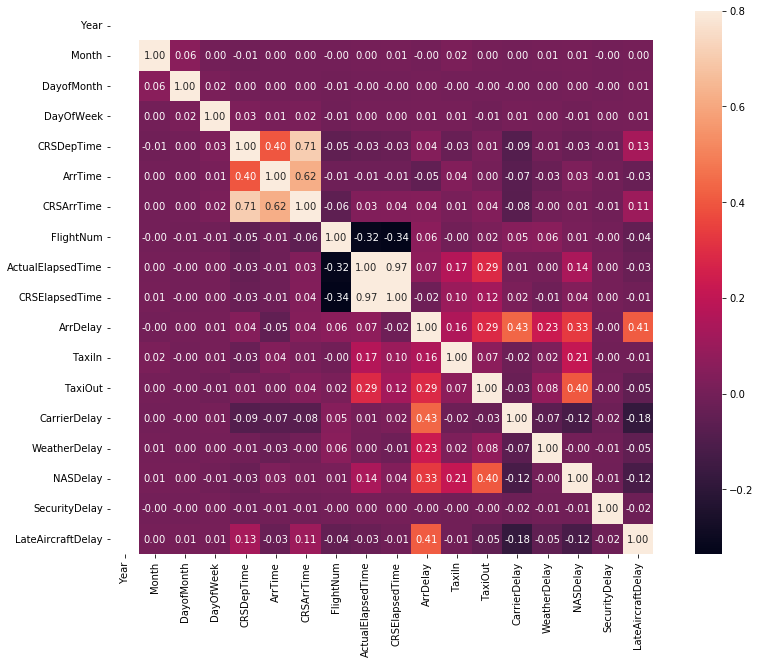

In [135]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, vmax=.8, annot=True, square=True, fmt='.2f')
plt.show()

In [51]:
df['Year'].value_counts()

2008    1928368
Name: Year, dtype: int64

In [52]:
display()

In [53]:
correlation_matrix[['ArrDelay','DepDelay']]

,ArrDelay,DepDelay
Year,NaN,NaN
Month,-0.000896,0.004234
DayofMonth,0.004124,0.005274
DayOfWeek,0.006121,0.008717
CRSDepTime,0.044449,0.059459
ArrTime,-0.050949,-0.052845
CRSArrTime,0.043079,0.054123
FlightNum,0.061263,0.052148
ActualElapsedTime,0.068130,0.018492
CRSElapsedTime,-0.015676,0.006836


In [54]:
round((df['ActualElapsedTime']-df['CRSElapsedTime']).describe(),2)

count    1928368.00
mean          -0.89
std           17.24
min         -181.00
25%          -10.00
50%           -3.00
75%            5.00
max          759.00
dtype: float64

In [55]:
round((df['CRSArrTime']-df['ArrTime']).describe(),2)

count    1928368.00
mean          23.95
std          447.69
min        -2399.00
25%          -89.00
50%          -30.00
75%           -7.00
max         2358.00
dtype: float64

In [56]:
round((df['CRSArrTime']-df['ArrTime']).describe(),2)

count    1928368.00
mean          23.95
std          447.69
min        -2399.00
25%          -89.00
50%          -30.00
75%           -7.00
max         2358.00
dtype: float64

In [57]:
round((df['ArrDelay']).describe(),2)

count    1928368.00
mean          42.20
std           56.78
min         -109.00
25%            9.00
50%           24.00
75%           56.00
max         2461.00
Name: ArrDelay, dtype: float64

In [58]:
df.drop(['Distance','AirTime'], axis=1, inplace=True)

In [59]:
correlation_matrix=df.corr()

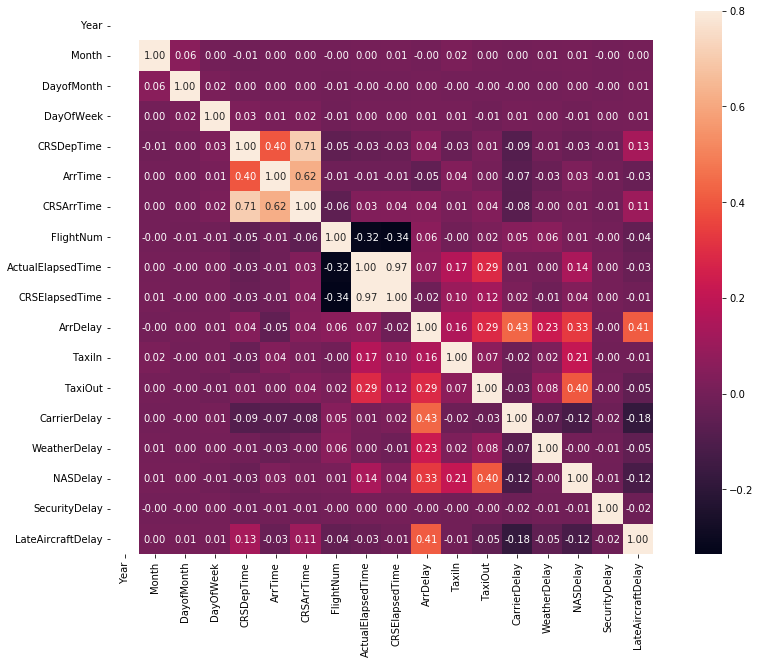

In [137]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, vmax=.8, annot=True, square=True, fmt='.2f')
plt.show()

In [61]:
df.drop(['DepDelay'], axis=1, inplace=True)

In [62]:
correlation_matrix=df.corr()

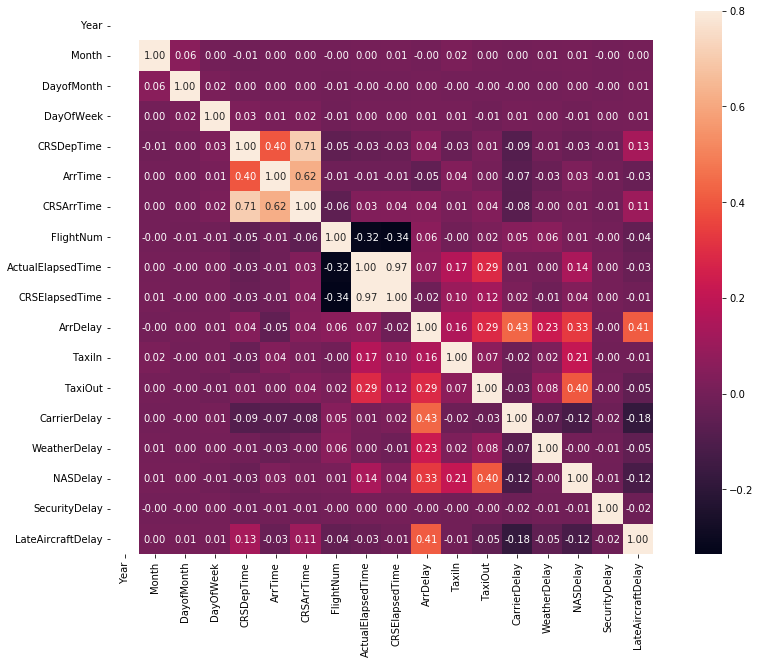

In [138]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, vmax=.8, annot=True, square=True, fmt='.2f')
plt.show()

In [64]:
df.drop(['Year'], axis=1, inplace=True)

In [68]:
### classification target

In [65]:
df.loc[ df['ArrDelay'] < 15 ,'ArrDelay_target'] = 0
df.loc[ df['ArrDelay'] >= 15 ,'ArrDelay_target'] = 1

In [69]:
df['ArrDelay_target'] = df['ArrDelay_target'].astype('int')

In [71]:
df['ArrDelay_target'].value_counts()

1    1247486
0     680882
Name: ArrDelay_target, dtype: int64

In [72]:
### histograms

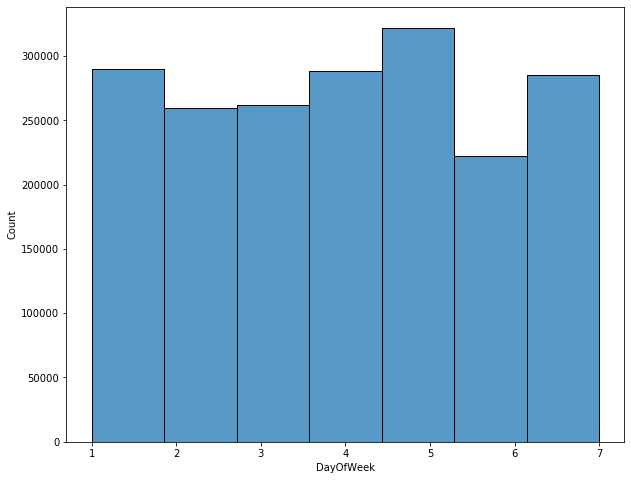

In [141]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="DayOfWeek",bins=7)
plt.xticks(range(1,8))
plt.show()

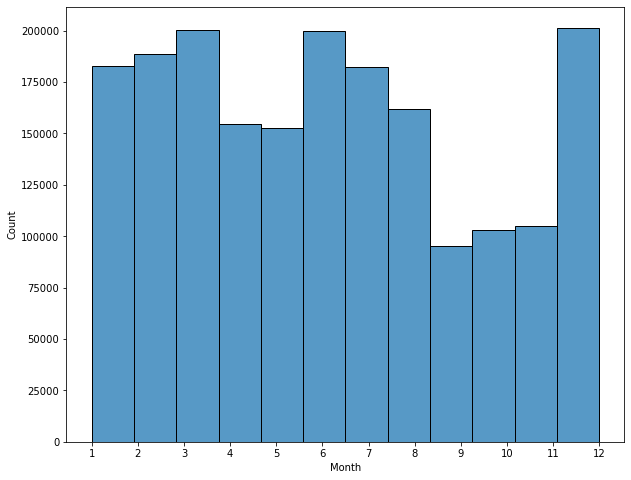

In [89]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="Month",bins=12)
plt.xticks(range(1,13))
plt.show()

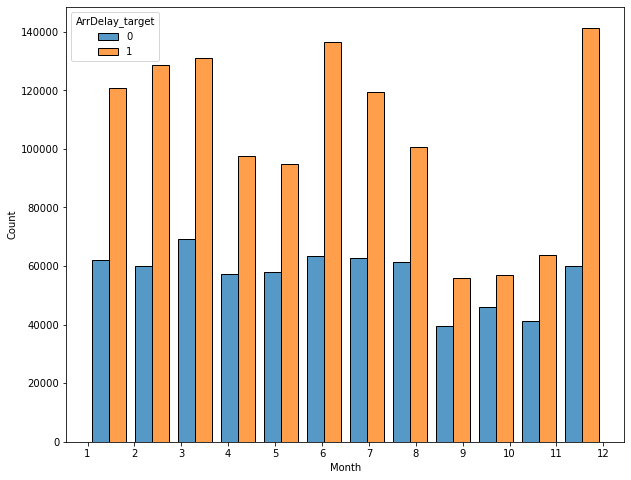

In [139]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="Month", hue="ArrDelay_target",bins=12, multiple="dodge", shrink=.8)
plt.xticks(range(1,13))
plt.show()

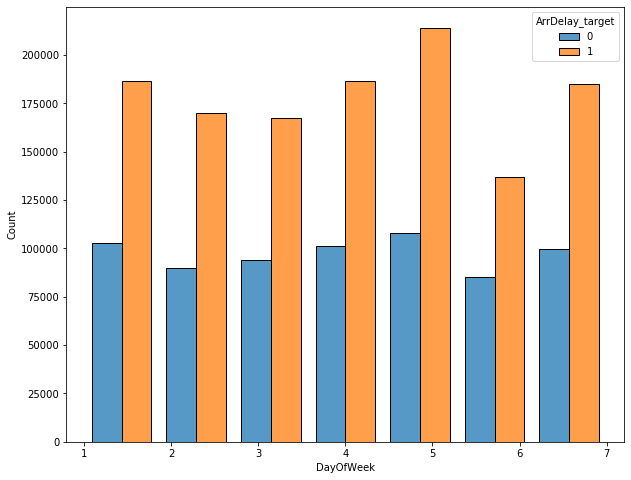

In [140]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="DayOfWeek", hue="ArrDelay_target",bins=7, multiple="dodge", shrink=.8)
plt.xticks(range(1,8))
plt.show()

In [90]:
df.loc[ df['ArrDelay'] < 30 ,'ArrDelay_target2'] = 0
df.loc[ df['ArrDelay'] >= 30 ,'ArrDelay_target2'] = 1

In [91]:
df['ArrDelay_target2'] = df['ArrDelay_target2'].astype('int')

In [98]:
df['ArrDelay_target'].value_counts()

1    1247486
0     680882
Name: ArrDelay_target, dtype: int64

In [97]:
df['ArrDelay_target2'].value_counts()

0    1077345
1     851023
Name: ArrDelay_target2, dtype: int64

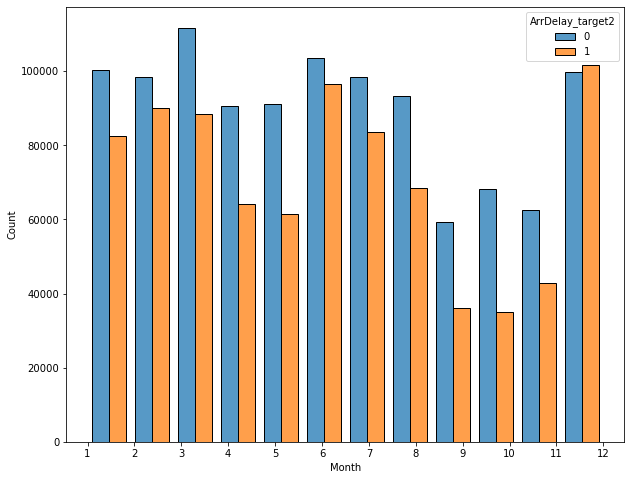

In [129]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="Month", hue="ArrDelay_target2",bins=12, multiple="dodge", shrink=.8)
plt.xticks(range(1,13))
plt.show()

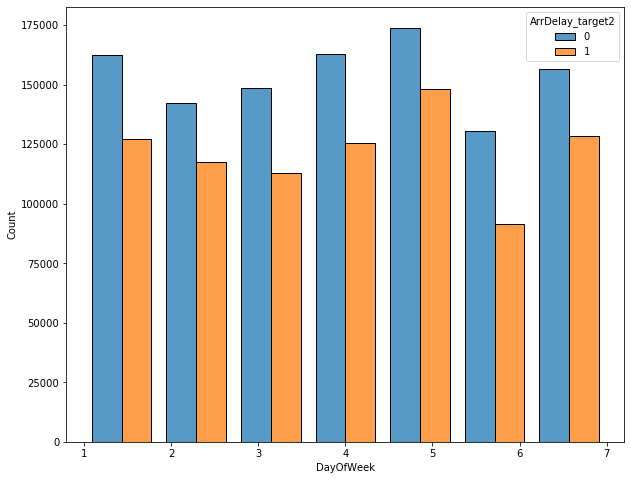

In [128]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="DayOfWeek", hue="ArrDelay_target2",bins=7, multiple="dodge", shrink=.8)
plt.xticks(range(1,8))
plt.show()

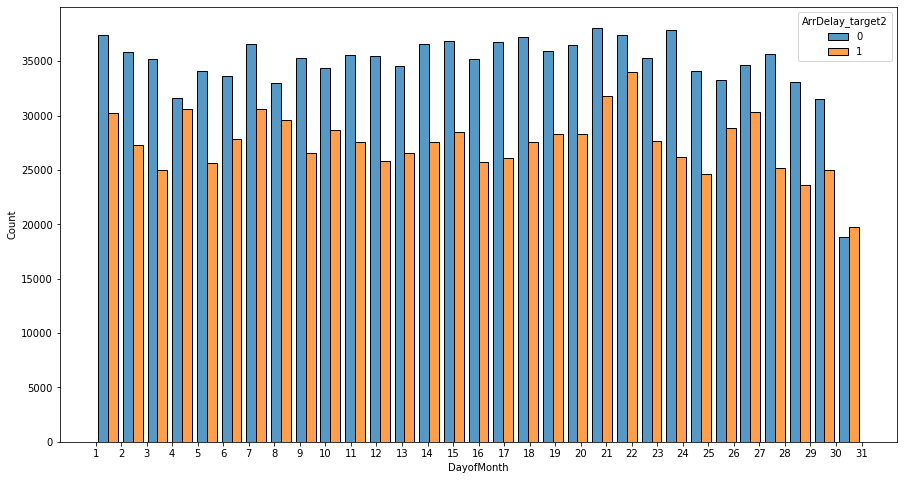

In [126]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x="DayofMonth", hue="ArrDelay_target2", multiple="dodge", shrink=.8, bins=31)
plt.xticks(range(1,32))
plt.show()

In [143]:
### Feature DayOfMonth not important....
### Feature Month = 3, 6, 12 has a lot of delays
### Feature DayOfWeek = Friday has a lot of delays

In [146]:
df.drop(['DayofMonth'], axis=1, inplace=True)

In [147]:
df.head()

,Month,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay_target,ArrDelay_target2
0,1,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,...,4.0,8.0,N,19.179399,3.703571,15.021635,0.090137,25.296466,0,0
1,1,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,...,5.0,10.0,N,19.179399,3.703571,15.021635,0.090137,25.296466,0,0
2,1,4,628.0,620,804.0,750,WN,448,N428WN,96.0,...,3.0,17.0,N,19.179399,3.703571,15.021635,0.090137,25.296466,0,0
4,1,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,...,3.0,10.0,N,2.000000,0.000000,0.000000,0.000000,32.000000,1,1
5,1,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,...,4.0,10.0,N,19.179399,3.703571,15.021635,0.090137,25.296466,0,0


In [149]:
df.loc[df['DayOfWeek'] == 5,'IsFriday'] = 1
df.loc[df['DayOfWeek'] != 5,'IsFriday'] = 0

In [152]:
df['DayOfWeek'].value_counts()

5    321982
1    289822
4    288343
7    284940
3    261498
2    259583
6    222200
Name: DayOfWeek, dtype: int64

In [153]:
df['IsFriday'].value_counts()

0.0    1606386
1.0     321982
Name: IsFriday, dtype: int64

In [154]:
df.loc[ df['Month'].isin([3,6,12]),  'Is_Mar_Jun_Dec'] = 1
df.loc[ ~df['Month'].isin([3,6,12]), 'Is_Mar_Jun_Dec'] = 0

In [161]:
df['Is_Mar_Jun_Dec'] = df['Is_Mar_Jun_Dec'].astype('int')

In [162]:
df["Is_Mar_Jun_Dec"].value_counts()

0    1326857
1     601511
Name: Is_Mar_Jun_Dec, dtype: int64

In [164]:
pd.crosstab(df["Is_Mar_Jun_Dec"], df["ArrDelay_target2"], normalize='columns')

ArrDelay_target2,0,1
Is_Mar_Jun_Dec,,
0,0.70761,0.663339
1,0.29239,0.336661


In [ ]:
# drop CRSElapsedTime 

In [165]:
df.drop(['CRSElapsedTime'], axis=1, inplace=True)

In [166]:
df.head()

,Month,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay_target,ArrDelay_target2,IsFriday,Is_Mar_Jun_Dec
0,1,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,...,N,19.179399,3.703571,15.021635,0.090137,25.296466,0,0,0.0,0
1,1,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,...,N,19.179399,3.703571,15.021635,0.090137,25.296466,0,0,0.0,0
2,1,4,628.0,620,804.0,750,WN,448,N428WN,96.0,...,N,19.179399,3.703571,15.021635,0.090137,25.296466,0,0,0.0,0
4,1,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,...,N,2.000000,0.000000,0.000000,0.000000,32.000000,1,1,0.0,0
5,1,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,...,N,19.179399,3.703571,15.021635,0.090137,25.296466,0,0,0.0,0


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928368 entries, 0 to 7009727
Data columns (total 25 columns):
Month                int64
DayOfWeek            int64
DepTime              object
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
ArrDelay             float64
Origin               object
Dest                 object
TaxiIn               float64
TaxiOut              float64
CancellationCode     object
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
ArrDelay_target      int64
ArrDelay_target2     int64
IsFriday             float64
Is_Mar_Jun_Dec       int64
dtypes: float64(11), int64(8), object(6)
memory usage: 382.5+ MB


In [170]:
df["FlightNum"].nunique()

7498

In [171]:
df['TailNum'].nunique()

5360

In [172]:
df['UniqueCarrier'].nunique()

20

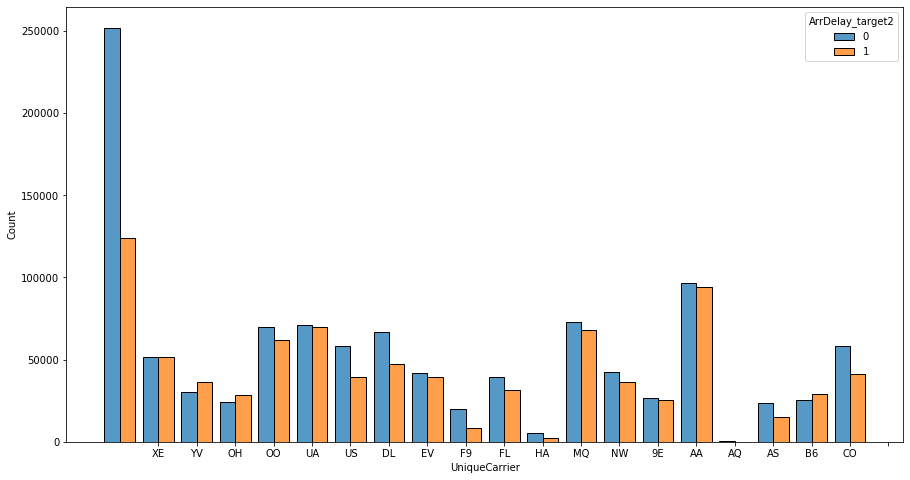

In [178]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x="UniqueCarrier", hue="ArrDelay_target2", multiple="dodge", shrink=.8, bins=20)
plt.xticks(range(1,21))
plt.show()

In [179]:
df['UniqueCarrier'].value_counts()

WN    376201
AA    190910
MQ    141223
UA    140904
OO    131780
DL    113728
XE    103147
CO     99731
US     98007
EV     81762
NW     78843
FL     70969
YV     66769
B6     54925
OH     52451
9E     51568
AS     39010
F9     28224
HA      7472
AQ       744
Name: UniqueCarrier, dtype: int64

In [180]:
pd.crosstab(df["UniqueCarrier"], df["ArrDelay_target2"], normalize='columns')

ArrDelay_target2,0,1
UniqueCarrier,,
9E,0.024482,0.029602
AA,0.089509,0.111017
AQ,0.000530,0.000203
AS,0.021932,0.018075
B6,0.023806,0.034403
CO,0.054084,0.048723
DL,0.061829,0.055365
EV,0.039017,0.046681
F9,0.018412,0.009856


In [187]:
pd.crosstab(df["TaxiIn"], df["ArrDelay_target2"], normalize='columns').sort_values(by=1, axis=1)

ArrDelay_target2,1,0
TaxiIn,,
0.0,0.000067,0.000058
1.0,0.003293,0.004027
2.0,0.035345,0.048353
3.0,0.105240,0.134589
4.0,0.150911,0.180860
...,...,...
199.0,0.000001,0.000000
200.0,0.000002,0.000000
207.0,0.000001,0.000000
